In [13]:
# Loan Default Prediction System
# Objective: Predict whether a loan applicant will default or repay

# Phase 1 – Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ROC Curve Code
from sklearn.metrics import roc_curve, auc

# Load dataset
df = pd.read_csv("loan_data.csv")
df.drop("Loan_ID", axis=1, inplace=True)

# Handle missing values
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include=np.number).columns

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()





,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.279851,0.45164,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.279851,0.45164,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.279851,0.45164,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.279851,0.45164,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.279851,0.45164,2,1


### 📌 Phase 1: Data Preprocessing

In this step, we clean the data by:
- Dropping unnecessary columns like `Loan_ID`
- Filling missing values using mode for categorical and mean for numerical
- Encoding categorical features using Label Encoding
- Scaling numerical features to normalize the range

This ensures the dataset is clean and ready for modeling.


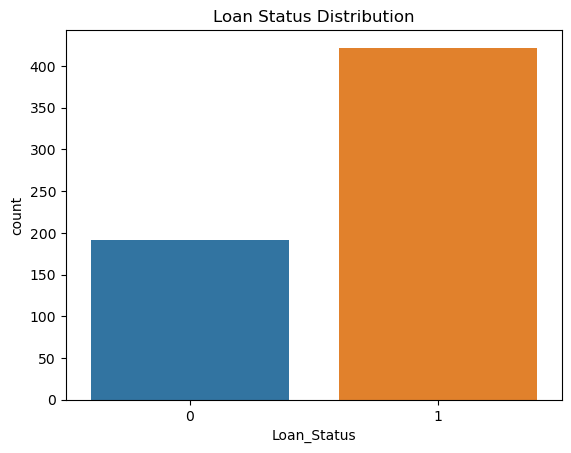

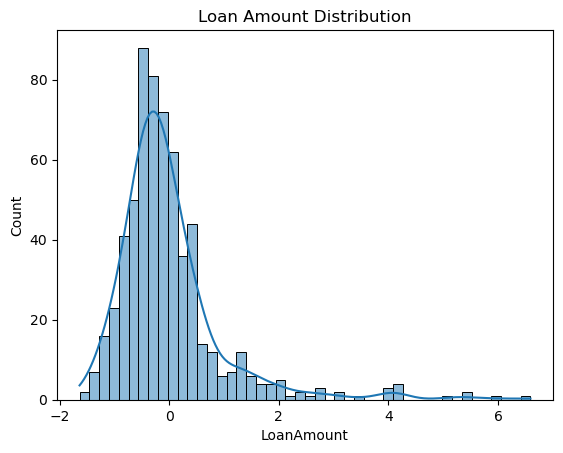

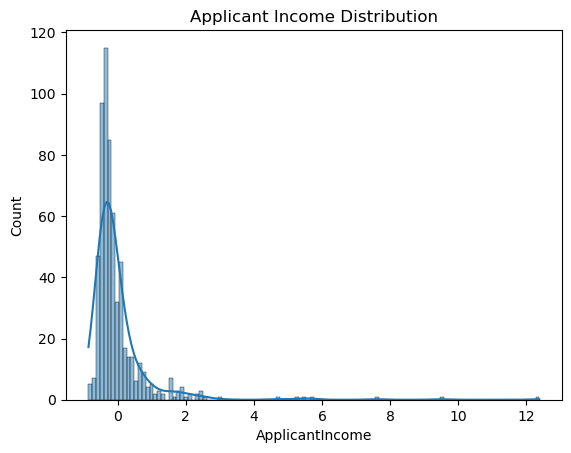

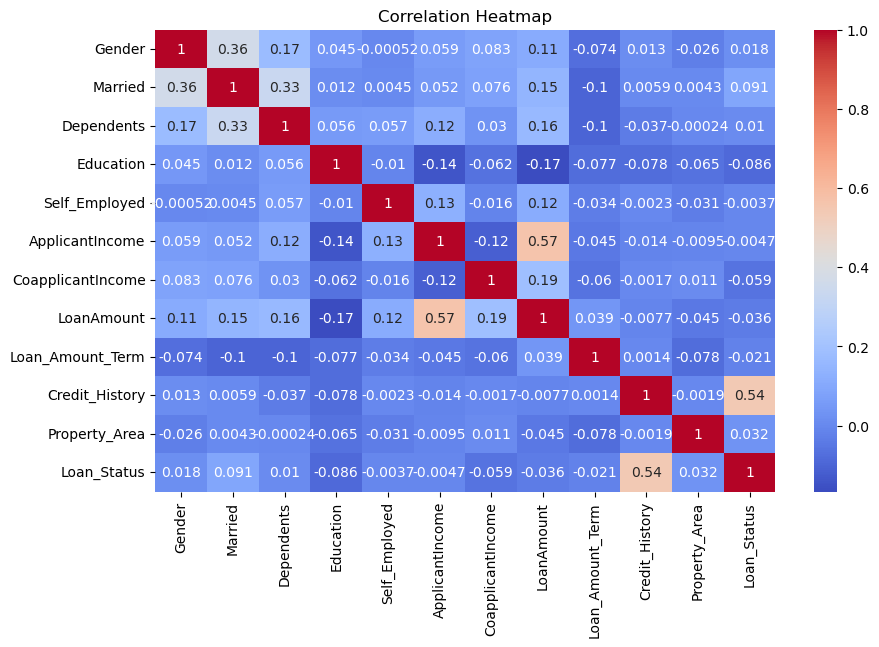

In [6]:
# Phase 2 – Exploratory Data Analysis (EDA)

# Loan status distribution
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

# LoanAmount distribution
sns.histplot(df["LoanAmount"], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Income distribution
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Applicant Income Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### 📊 Phase 2: Exploratory Data Analysis (EDA)

Here we explore the data visually:
- Most loans are approved (`Loan_Status = Y`)
- Loan amounts and applicant income are right-skewed
- Heatmap shows correlation among numeric features

EDA helps understand patterns that influence loan approval.


In [12]:

# Phase 3 – Model Building

# Split features and target
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Training and Evaluation
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Model: Logistic Regression
✅ Accuracy: 0.7886178861788617
📊 Confusion Matrix:
 [[18 25]
 [ 1 79]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


🔍 Model: Decision Tree
✅ Accuracy: 0.7154471544715447
📊 Confusion Matrix:
 [[23 20]
 [15 65]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57        43
           1       0.76      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.68      0.67      0.68       123
weighted avg       0.71      0.72      0.71       123


🔍 Model: Random Forest
✅ Accuracy: 0.7804878048780488
📊 Confusion Matrix:
 [[18 25]
 [ 2 78]]
📄 C

### 🤖 Phase 3: Model Building & Evaluation

We trained 3 models:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier

Each model was evaluated on accuracy, confusion matrix, and classification report.


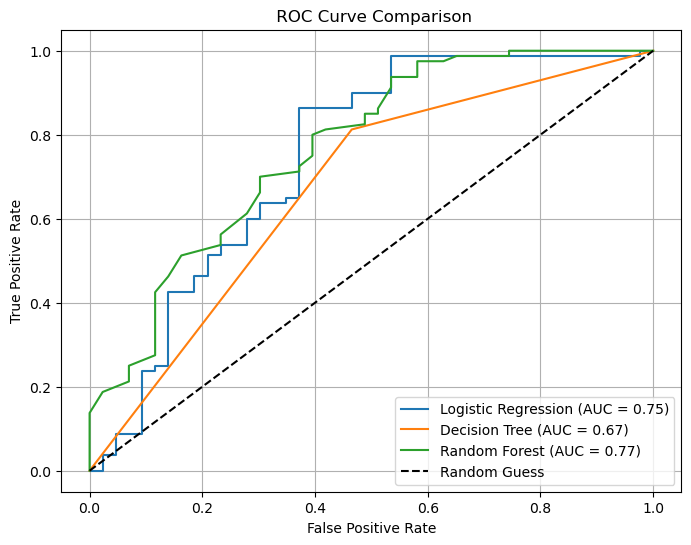

In [9]:
# ✅ Phase 4 – Model Comparison
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        continue

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title(" ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 📈 Phase 4: Model Comparison with ROC Curve

ROC Curve shows how well each model distinguishes between defaulters and non-defaulters. The higher the AUC, the better the model performs.

From the results, we choose the model with the highest F1-score or AUC as the final model.
